In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import torch 
from torch import nn

In [22]:
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[2.0], [4.0], [6.0]])
# x_data = torch.Tensor([[473.0], [442.0], [353.0], [343.0], [337.0]])
# y_data = torch.Tensor([[762.0], [724.0], [546.0], [553.0], [512.0]])
print(x_data.shape)

torch.Size([3, 1])


In [23]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
model = LinearModel()

In [24]:
model

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [25]:
criterion = nn.MSELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [26]:
loss_list = []
for epoch in range(1000):
    y_pred = model(x_data)
#     print(y_pred.shape) torch.Size([3, 1])
    loss = criterion(y_pred, y_data)
    

    loss_list.append(loss.item())
#     所有权重梯度归零！！
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

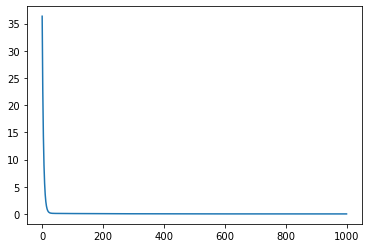

In [27]:
plt.plot(range(1000), loss_list)

In [28]:
print("w=", model.linear.weight.item())
print("b=", model.linear.bias.item())
x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print("y_pred=", y_test.data)

w= 1.9651610851287842
b= 0.07919718325138092
y_pred= tensor([[7.9398]])
